In [12]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [13]:
N = 50                               
x_start, x_end = -2.0, 2.0           
y_start, y_end = -1.0, 1.0            
x = numpy.linspace(x_start, x_end, N)    
y = numpy.linspace(y_start, y_end, N)    
X, Y = numpy.meshgrid(x, y)             


In [14]:
k = 1.0                           
x_d, y_d = 0.0, 0.0       
u_inf = 1.0             
u = (-k / (2 * math.pi) * ((X - x_d)**2 - (Y - y_d)**2) / ((X - x_d)**2 + (Y - y_d)**2)**2)
v = (-k / (2 * math.pi) * 2 * (X - x_d) * (Y - y_d) / ((X - x_d)**2 + (Y - y_d)**2)**2)
psi = -k / (2 * math.pi) * (Y - y_d) / ((X - x_d)**2 + (Y - y_d)**2)
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)
psi_freestream = u_inf * Y
u = u_freestream + u
v = v_freestream + v
psi = psi_freestream + psi

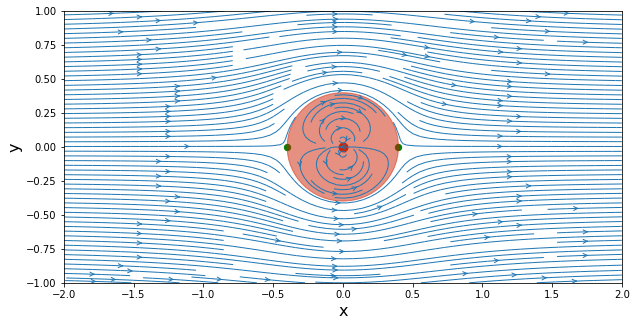

In [17]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_d, y_d, color='#CD2305', s=80, marker='o')
R = math.sqrt(k / (2 * math.pi * u_inf))
circle = pyplot.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)
x_stagn1, y_stagn1 = +math.sqrt(k / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(k / (2 * math.pi * u_inf)), 0.0
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=40, marker='o');

# adding vortex along with cylinder

In [18]:
g = 4.0                      # strength of the vortex
x_v, y_v = 0.0, 0.0
u_vortex = +g / (2 * math.pi) * (Y - y_v) / ((X - x_v)**2 + (Y - y_v)**2)
v_vortex = -g / (2 * math.pi) * (X - x_v) / ((X - x_v)**2 + (Y - y_v)**2)
psi_vortex = g / (4 * math.pi) * numpy.log((X - x_v)**2 + (Y - y_v)**2)

In [22]:
u_total = u_freestream + u + u_vortex
v_total = v_freestream + v + v_vortex
psi_total = psi_freestream + psi + psi_vortex

In [28]:
R = math.sqrt(k / (2 * math.pi * u_inf))
x_stagnew1, y_stagnew1 = (+math.sqrt(R**2 - (g / (4 * math.pi * u_inf))**2),
                      -g / (4 * math.pi * u_inf))
x_stagnew2, y_stagnew2 = (-math.sqrt(R**2 - (g / (4 * math.pi * u_inf))**2),
                      -g / (4 * math.pi * u_inf))

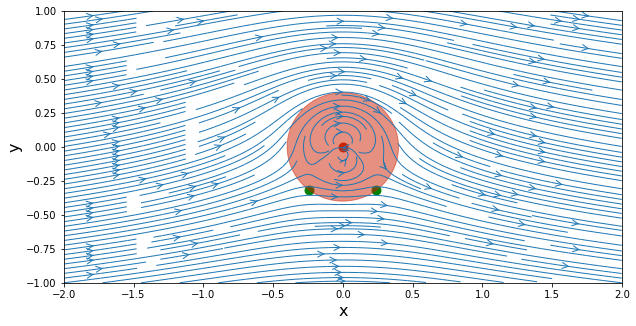

In [31]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_total, v_total,
                  density=2, linewidth=1, arrowsize=1.5, arrowstyle='->')
circle = pyplot.Circle((0.0, 0.0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)
pyplot.scatter(x_v, y_v, color='#CD2305', s=80, marker='o')
pyplot.scatter([x_stagnew1, x_stagnew2], [y_stagnew1, y_stagnew2], color='g', s=80, marker='o');

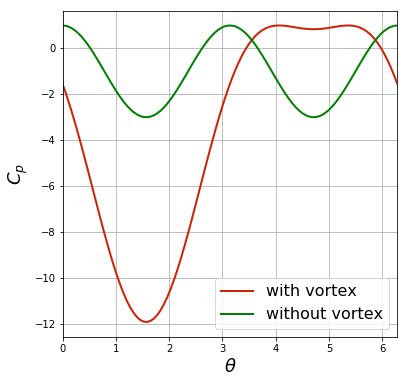

In [32]:
theta = numpy.linspace(0.0, 2 * math.pi, 100)
u_theta = -2 * u_inf * numpy.sin(theta) - g / (2 * math.pi * R)
cp = 1.0 - (u_theta / u_inf)**2
u_theta_no_vortex = -2 * u_inf * numpy.sin(theta)
cp_no_vortex = 1.0 - (u_theta_no_vortex / u_inf)**2
size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel(r'$\theta$', fontsize=18)
pyplot.ylabel('$C_p$', fontsize=18)
pyplot.xlim(theta.min(), theta.max())
pyplot.plot(theta, cp,
            label='with vortex', color='#CD2305', linewidth=2, linestyle='-')
pyplot.plot(theta, cp_no_vortex,
            label='without vortex', color='g', linewidth=2, linestyle='-')
pyplot.legend(loc='best', prop={'size':16});